In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
d=pd.read_table(r'C:\Users\Tanvir Khan\Desktop\fruit.txt')
d.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [2]:
# remove NA from the last column
d['color_score']=d['color_score'].fillna(.59)
d.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116.0,6.1,8.5,0.71
55,4,lemon,unknown,116.0,6.3,7.7,0.72
56,4,lemon,unknown,116.0,5.9,8.1,0.73
57,4,lemon,unknown,152.0,6.5,8.5,0.72
58,4,lemon,unknown 118,6.1,8.1,0.7,0.59


In [3]:
# define the predictors and the column to predict
X=d[['mass', 'width', 'height', 'color_score']]
y=d[['fruit_label']]

In [4]:
# do the train test slice
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, test_size=.25)

In [5]:
# import the classifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# run the classifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("The Accuracy Level of the Classifier is :", knn.score(X_test, y_test))
#knn.score(X_test, y_test)

The Accuracy Level of the Classifier is : 0.5333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# prediction
print(knn.predict([[50, 11, 21, .28]]))

[2]


In [8]:
# create a dictionary to predict the names
lookup_fruit_name=dict(zip(d.fruit_label.unique(), d.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [9]:
# predict for all elements of test set
y_test_pred=knn.predict(X_test)
print(y_test_pred)
type(y_test_pred)
# map the lookup_fruit_name function for all the elements of preduction of test set to get the name
dat=list(map(lambda x: lookup_fruit_name[x], y_test_pred))
dat

[3 1 4 4 1 1 1 3 3 4 2 1 3 1 4]


['orange',
 'apple',
 'lemon',
 'lemon',
 'apple',
 'apple',
 'apple',
 'orange',
 'orange',
 'lemon',
 'mandarin',
 'apple',
 'orange',
 'apple',
 'lemon']

In [10]:
lookup_fruit_name[y_test_pred[0]]

'orange'

In [11]:
# confustion matrix
from sklearn.metrics import confusion_matrix
y_train_pred=knn.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[12,  0,  2,  1],
       [ 0,  4,  0,  0],
       [ 2,  0,  9,  0],
       [ 3,  1,  0, 10]], dtype=int64)

In [12]:
y_test_pred=knn.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[3, 0, 0, 1],
       [0, 1, 0, 0],
       [3, 0, 3, 2],
       [0, 0, 1, 1]], dtype=int64)

In [13]:
# crosstab to see the number of items
pd.crosstab(index=d['fruit_label'], columns='count')

col_0,count
fruit_label,
1,19
2,5
3,19
4,16


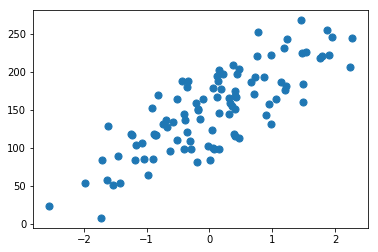

In [14]:
## regression
X_fruits=d[['height', 'width']]
y_fruits=d[['fruit_label']]

from sklearn.datasets import make_regression

X_r, y_r=make_regression(n_samples=100, n_features=1, n_informative=1, bias=150, noise=30, random_state=0)

plt.scatter(X_r, y_r, marker='o', s=50)

In [15]:
data=make_regression()

In [16]:
from sklearn.datasets import make_friedman1 #one
dp=make_friedman1()
dp

(array([[8.47062659e-01, 1.57288042e-01, 9.12579088e-01, 7.18727702e-01,
         1.39333990e-02, 6.77041189e-01, 4.89529290e-01, 3.62712474e-01,
         8.32668166e-01, 6.92525722e-01],
        [4.72568531e-01, 8.85483174e-01, 1.81400238e-01, 4.54384940e-01,
         2.97564412e-01, 1.01637535e-01, 8.05279331e-01, 4.09423980e-01,
         6.37313060e-01, 5.27709897e-01],
        [2.54816606e-02, 2.01910105e-01, 4.72332675e-01, 1.80986378e-01,
         9.05106799e-01, 5.28722543e-02, 4.66138553e-01, 9.42798518e-01,
         9.73234723e-01, 3.16506062e-01],
        [1.76664230e-01, 5.37567067e-01, 8.11066518e-01, 7.86026320e-01,
         2.05565951e-01, 6.06232722e-01, 2.85597815e-01, 9.98292119e-01,
         6.10244839e-01, 3.14358217e-01],
        [9.23417325e-01, 4.19059565e-01, 8.22216821e-01, 7.17991693e-01,
         7.83204286e-01, 7.84641578e-01, 7.81068891e-01, 9.32264095e-01,
         7.96815895e-01, 4.20036206e-01],
        [4.20437978e-01, 1.87561018e-01, 5.58998152e-01, 9.7

In [17]:
cr=pd.read_csv('D:\GoogleDrive\python\crimedata.csv', encoding='latin-1')
cr.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [18]:
## KNN regression
## this regression model predicts the y value of a given x value by taking mean of the n nearest values 
## of x from 
## train set (those are nearest of the given x test value)
from sklearn.neighbors import KNeighborsRegressor

#replace special characters from the dataset
dic={'?':0}

cr.replace(dic, inplace=True)

# select the independent/features and dependent/label
X=cr[['racepctblack', 'racePctWhite', 'racePctAsian']]
y=cr[['ViolentCrimesPerPop']].apply(pd.to_numeric) #to numeric turns the data to numeric

# split train test
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

# fit the regression
knnreg=KNeighborsRegressor(n_neighbors=5)

knnreg.fit(X_train, y_train)

# predict
knnreg.predict(X_test)

# get the R squared value
knnreg.score(X_test, y_test)

0.27948936917901

In [19]:
## linear regression
from sklearn.linear_model import LinearRegression

# select the independent/features and dependent/label
X=cr[['racepctblack']]
y=cr[['ViolentCrimesPerPop']].apply(pd.to_numeric) #to numeric turns the data to numeric

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0, test_size=.25)

# fit the regression
rgg=LinearRegression()

rgg.fit(X_train, y_train)

# get the intercept and coef
print ("Linear Model Intercept B0: {}".format(rgg.intercept_))

print("Linear Model Slope B1: {}".format(rgg.coef_))
#print(rgg.coef_)


Linear Model Intercept B0: [297.31686455]
Linear Model Slope B1: [[25.3084111]]


In [20]:
# get the R squared
print("R Squared value for train set:", rgg.score(X_train, y_train))
print("R Squared value for test set:", rgg.score(X_test, y_test))

R Squared value for train set: 0.3510743567173942
R Squared value for test set: 0.2644390453201826


Text(0,0.5,'Dependent Variable')

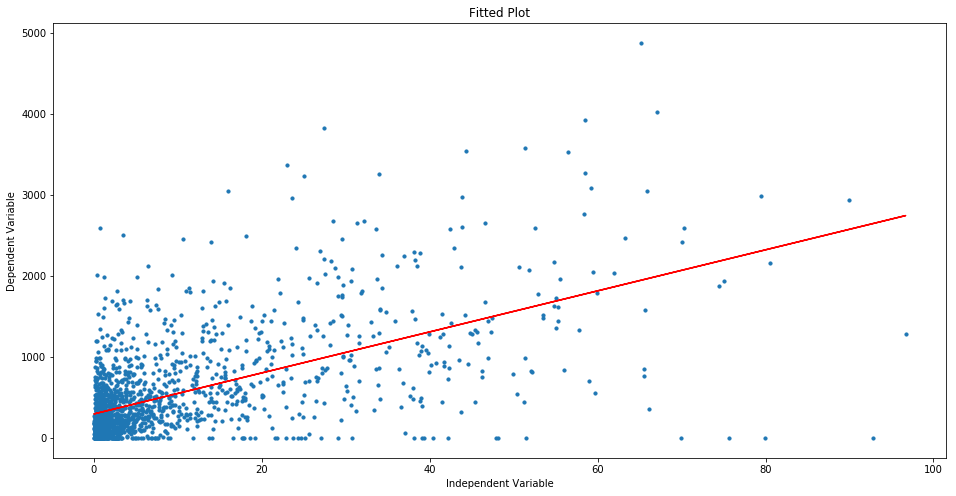

In [21]:
# plot the fitted line
plt.figure(figsize=(16, 8))
plt.scatter(X_train.iloc[:,0], y_train.iloc[:,0], marker='o', s=10)
plt.plot(X_train, rgg.coef_* X_train+rgg.intercept_, 'r-')
plt.title('Fitted Plot')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

In [24]:
# predict value

# for a single value of z
z=52

rgg.intercept_+rgg.coef_*z
# for the entire X_test
rgg.predict(X_test)

array([[ 471.18564883],
       [ 317.56359343],
       [ 419.30340607],
       [ 311.99574299],
       [ 321.10677098],
       [ 311.23649065],
       [ 324.64994854],
       [ 303.39088321],
       [ 307.18714488],
       [ 313.00807943],
       [ 302.63163088],
       [ 332.74864009],
       [ 519.77779815],
       [ 322.87835976],
       [ 310.73032243],
       [ 445.87723772],
       [ 355.52621008],
       [ 460.80920028],
       [ 321.86602332],
       [ 471.43873294],
       [ 324.14378032],
       [ 878.14489938],
       [2122.81255746],
       [ 315.53892054],
       [ 319.84135043],
       [ 322.11910743],
       [ 338.31649053],
       [ 310.98340654],
       [ 622.27686312],
       [ 404.1183594 ],
       [ 602.78938657],
       [ 311.99574299],
       [ 375.77293897],
       [ 312.2488271 ],
       [ 373.24209786],
       [ 302.88471499],
       [ 616.20284445],
       [ 300.10078977],
       [ 403.86527529],
       [ 318.32284576],
       [1636.38489604],
       [ 318.829

In [23]:
# ridge regression
## regression is about minimizing error sum or square (actually mean error sum of square)
## sum (y-yhat)^2
## but overfitting might be a problem if many predictors are used
## and if they are highly correlated
## so ridge regression ask to minimize sum(y-yhat)^2+c(b1^2+b2^2+..)
## so if many predictors are used the error sum of square will increase and ultimately the overfitting
## might be overcome
## it will keep the model simple ie it will choose the model with smaller coef values
## overfitting is controlled by the coef c